In [177]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [178]:
import cv2
import os
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

80-20 Split

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)
            if img is not None:
                images.append(img)
                labels.append(label)
    return images, labels

folder_a = '/content/drive/MyDrive/atypicalNevus'
folder_b = '/content/drive/MyDrive/commonNevus'
folder_c = '/content/drive/MyDrive/melanoma'

label_a = 'atypicalNevus'
label_b = 'commonNevus'
label_c = 'melonama'

images_a, labels_a = load_images_from_folder(folder_a, label_a)
images_b, labels_b = load_images_from_folder(folder_b, label_b)
images_c, labels_c = load_images_from_folder(folder_c, label_c)

all_images = np.concatenate([images_a, images_b, images_c])
all_labels = np.concatenate([labels_a, labels_b, labels_c])

all_images, all_labels = shuffle(all_images, all_labels, random_state=42)

train_data, test_data, train_labels, test_labels = train_test_split(
    all_images, all_labels, test_size=0.2, random_state=42
)

print(f"Train set shape - Images: {train_data.shape}, Labels: {train_labels.shape}")
print(f"Test set shape - Images: {test_data.shape}, Labels: {test_labels.shape}")

Train set shape - Images: (160, 224, 224, 3), Labels: (160,)
Test set shape - Images: (40, 224, 224, 3), Labels: (40,)


In [180]:
def extract_hog_features(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Resize the image to a fixed size (optional)
    resized = cv2.resize(gray, (64, 128))
    # Calculate the HoG features
    hog = cv2.HOGDescriptor()
    features = hog.compute(resized)
    return features.flatten()

In [181]:
train_data_features = []


for image in train_data:
  features = extract_hog_features(image)
  train_data_features.append(features)

train_data_features = np.array(train_data_features)
train_labels = np.array(train_labels)

  SVM Model
  

In [182]:
svm_model = SVC()
svm_model.fit(train_data_features,train_labels)

SVC()

In [183]:
test_data_features = []


for image in test_data:
  features = extract_hog_features(image)
  test_data_features.append(features)

test_data_features = np.array(test_data_features)
test_labels = np.array(test_labels)

In [184]:
y_pred_test = svm_model.predict(test_data_features)
accuracy_test_svm = accuracy_score(test_labels, y_pred_test)
print("Test Accuracy:", accuracy_test_svm)

Test Accuracy: 0.45


In [185]:
y_pred_train = svm_model.predict(train_data_features)
accuracy_train = accuracy_score(train_labels, y_pred_train)
print("Train Accuracy:", accuracy_train)

Train Accuracy: 0.925


In [186]:
from sklearn.metrics import classification_report, confusion_matrix
target_names = ['aTypicalnevus', 'commonnevus', 'melanoma']

print("Classification Report:")
print(classification_report(test_labels, y_pred_test, target_names= target_names))

print("Confusion Matrix:")
print(confusion_matrix(test_labels, y_pred_test))

Classification Report:
               precision    recall  f1-score   support

aTypicalnevus       0.36      0.33      0.34        15
  commonnevus       0.52      0.71      0.60        17
     melanoma       0.33      0.12      0.18         8

     accuracy                           0.45        40
    macro avg       0.40      0.39      0.38        40
 weighted avg       0.42      0.45      0.42        40

Confusion Matrix:
[[ 5  8  2]
 [ 5 12  0]
 [ 4  3  1]]


Random Forest

In [187]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

rf_model.fit(train_data_features, train_labels)

y_pred_test = rf_model.predict(test_data_features)
accuracy_test_rf = accuracy_score(test_labels, y_pred_test)
print("Test Accuracy:", accuracy_test_rf)

y_pred_train = rf_model.predict(train_data_features)
accuracy_train = accuracy_score(train_labels, y_pred_train)
print("Train Accuracy:", accuracy_train)

from sklearn.metrics import classification_report, confusion_matrix
target_names = ['aTypicalnevus', 'commonnevus', 'melanoma']

print("Classification Report:")
print(classification_report(test_labels, y_pred_test, target_names= target_names))

print("Confusion Matrix:")
print(confusion_matrix(test_labels, y_pred_test))

Test Accuracy: 0.475
Train Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

aTypicalnevus       0.40      0.40      0.40        15
  commonnevus       0.57      0.71      0.63        17
     melanoma       0.25      0.12      0.17         8

     accuracy                           0.48        40
    macro avg       0.41      0.41      0.40        40
 weighted avg       0.44      0.47      0.45        40

Confusion Matrix:
[[ 6  6  3]
 [ 5 12  0]
 [ 4  3  1]]


K-Nearest Neighbours


In [188]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)

knn_model.fit(train_data_features, train_labels)

y_pred_test = knn_model.predict(test_data_features)
accuracy_test_knn = accuracy_score(test_labels, y_pred_test)
print("Test Accuracy:", accuracy_test_knn)


y_pred_train = knn_model.predict(train_data_features)
accuracy_train = accuracy_score(train_labels, y_pred_train)
print("Train Accuracy:", accuracy_train)

from sklearn.metrics import classification_report, confusion_matrix
target_names = ['aTypicalnevus', 'commonnevus', 'melanoma']

print("Classification Report:")
print(classification_report(test_labels, y_pred_test, target_names= target_names))

print("Confusion Matrix:")
print(confusion_matrix(test_labels, y_pred_test))

Test Accuracy: 0.45
Train Accuracy: 0.68125
Classification Report:
               precision    recall  f1-score   support

aTypicalnevus       0.43      0.40      0.41        15
  commonnevus       0.48      0.65      0.55        17
     melanoma       0.33      0.12      0.18         8

     accuracy                           0.45        40
    macro avg       0.41      0.39      0.38        40
 weighted avg       0.43      0.45      0.43        40

Confusion Matrix:
[[ 6  7  2]
 [ 6 11  0]
 [ 2  5  1]]


Descision Tree

In [189]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

tree_model = DecisionTreeClassifier(random_state=42)

tree_model.fit(train_data_features, train_labels)

y_pred_test = tree_model.predict(test_data_features)
accuracy_test_dt = accuracy_score(test_labels, y_pred_test)
print("Test Accuracy:", accuracy_test_dt)


y_pred_train = tree_model.predict(train_data_features)
accuracy_train = accuracy_score(train_labels, y_pred_train)
print("Train Accuracy:", accuracy_train)

from sklearn.metrics import classification_report, confusion_matrix
target_names = ['aTypicalnevus', 'commonnevus', 'melanoma']

print("Classification Report:")
print(classification_report(test_labels, y_pred_test, target_names= target_names))

print("Confusion Matrix:")
print(confusion_matrix(test_labels, y_pred_test))

Test Accuracy: 0.5
Train Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

aTypicalnevus       0.44      0.47      0.45        15
  commonnevus       0.69      0.53      0.60        17
     melanoma       0.36      0.50      0.42         8

     accuracy                           0.50        40
    macro avg       0.50      0.50      0.49        40
 weighted avg       0.53      0.50      0.51        40

Confusion Matrix:
[[7 3 5]
 [6 9 2]
 [3 1 4]]


Naive Bayes

In [190]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


mnb_model = MultinomialNB()

mnb_model.fit(train_data_features, train_labels)

y_pred_test = tree_model.predict(test_data_features)
accuracy_test_nb = accuracy_score(test_labels, y_pred_test)
print("Test Accuracy:", accuracy_test_nb)


y_pred_train = tree_model.predict(train_data_features)
accuracy_train = accuracy_score(train_labels, y_pred_train)
print("Train Accuracy:", accuracy_train)

from sklearn.metrics import classification_report, confusion_matrix
target_names = ['aTypicalnevus', 'commonnevus', 'melanoma']

print("Classification Report:")
print(classification_report(test_labels, y_pred_test, target_names= target_names))

print("Confusion Matrix:")
print(confusion_matrix(test_labels, y_pred_test))

Test Accuracy: 0.5
Train Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

aTypicalnevus       0.44      0.47      0.45        15
  commonnevus       0.69      0.53      0.60        17
     melanoma       0.36      0.50      0.42         8

     accuracy                           0.50        40
    macro avg       0.50      0.50      0.49        40
 weighted avg       0.53      0.50      0.51        40

Confusion Matrix:
[[7 3 5]
 [6 9 2]
 [3 1 4]]


Comparing accuracy of all 5 ML models

In [191]:
print("Test Accuracy of naive bayes:", accuracy_test_nb)
print("Test Accuracy of descision tree:", accuracy_test_dt)
print("Test Accuracy of K nearest neighbours:", accuracy_test_knn)
print("Test Accuracy of support vector machine:", accuracy_test_svm)
print("Test Accuracy of random forest:", accuracy_test_rf)

Test Accuracy of naive bayes: 0.5
Test Accuracy of descision tree: 0.5
Test Accuracy of K nearest neighbours: 0.45
Test Accuracy of support vector machine: 0.45
Test Accuracy of random forest: 0.475


Histograms

<ipython-input-192-8de899aed1a6>:12: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd1, hog_image1 = hog(image1, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)
<ipython-input-192-8de899aed1a6>:13: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd2, hog_image2 = hog(image2, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)
<ipython-input-192-8de899aed1a6>:14: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd3, hog_image3 = hog(image3, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)


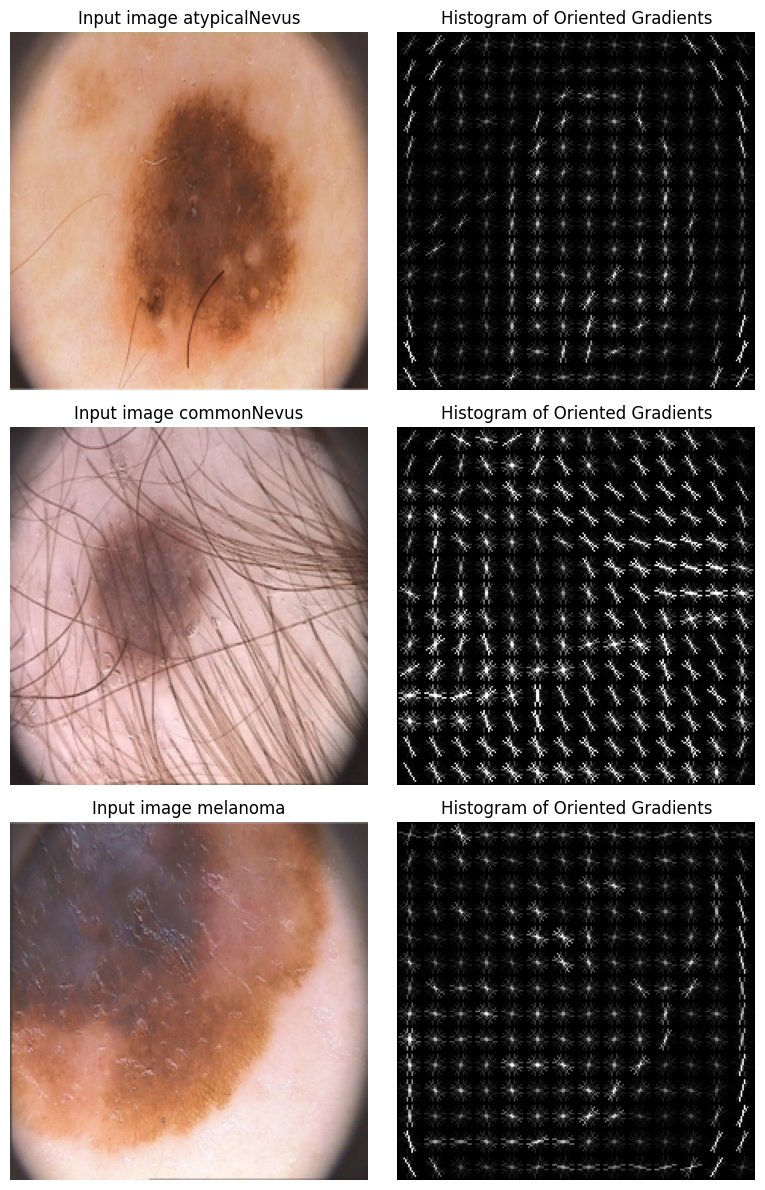

In [192]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
from skimage.io import imread

# Load images
image1 = imread('/content/drive/MyDrive/atypicalNevus/IMD002.png')
image2 = imread('/content/drive/MyDrive/commonNevus/IMD003.png')
image3 = imread('/content/drive/MyDrive/melanoma/IMD061.png')

# Calculate HOG features
fd1, hog_image1 = hog(image1, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)
fd2, hog_image2 = hog(image2, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)
fd3, hog_image3 = hog(image3, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)

# Create subplots for each image and HOG pair
fig, axes = plt.subplots(3, 2, figsize=(8, 12))

# Plot atypicalNevus
axes[0, 0].imshow(image1, cmap=plt.cm.gray)
axes[0, 0].set_title('Input image atypicalNevus')
axes[0, 0].axis('off')

hog_image1_rescaled = exposure.rescale_intensity(hog_image1, in_range=(0, 10))
axes[0, 1].imshow(hog_image1_rescaled, cmap=plt.cm.gray)
axes[0, 1].set_title('Histogram of Oriented Gradients')
axes[0, 1].axis('off')

# Plot commonNevus
axes[1, 0].imshow(image2, cmap=plt.cm.gray)
axes[1, 0].set_title('Input image commonNevus')
axes[1, 0].axis('off')

hog_image2_rescaled = exposure.rescale_intensity(hog_image2, in_range=(0, 10))
axes[1, 1].imshow(hog_image2_rescaled, cmap=plt.cm.gray)
axes[1, 1].set_title('Histogram of Oriented Gradients')
axes[1, 1].axis('off')

# Plot melanoma
axes[2, 0].imshow(image3, cmap=plt.cm.gray)
axes[2, 0].set_title('Input image melanoma')
axes[2, 0].axis('off')

hog_image3_rescaled = exposure.rescale_intensity(hog_image3, in_range=(0, 10))
axes[2, 1].imshow(hog_image3_rescaled, cmap=plt.cm.gray)
axes[2, 1].set_title('Histogram of Oriented Gradients')
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()


70-30 Split

In [193]:
import cv2
import os
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)
            if img is not None:
                images.append(img)
                labels.append(label)
    return images, labels

folder_a = '/content/drive/MyDrive/atypicalNevus'
folder_b = '/content/drive/MyDrive/commonNevus'
folder_c = '/content/drive/MyDrive/melanoma'

label_a = 'atypicalNevus'
label_b = 'commonNevus'
label_c = 'melonama'

images_a, labels_a = load_images_from_folder(folder_a, label_a)
images_b, labels_b = load_images_from_folder(folder_b, label_b)
images_c, labels_c = load_images_from_folder(folder_c, label_c)

all_images = np.concatenate([images_a, images_b, images_c])
all_labels = np.concatenate([labels_a, labels_b, labels_c])

all_images, all_labels = shuffle(all_images, all_labels, random_state=42)

train_data, test_data, train_labels, test_labels = train_test_split(
    all_images, all_labels, test_size=0.3, random_state=42
)

print(f"Train set shape - Images: {train_data.shape}, Labels: {train_labels.shape}")
print(f"Test set shape - Images: {test_data.shape}, Labels: {test_labels.shape}")

Train set shape - Images: (140, 224, 224, 3), Labels: (140,)
Test set shape - Images: (60, 224, 224, 3), Labels: (60,)


In [194]:
def extract_hog_features(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Resize the image to a fixed size (optional)
    resized = cv2.resize(gray, (64, 128))
    # Calculate the HoG features
    hog = cv2.HOGDescriptor()
    features = hog.compute(resized)
    return features.flatten()

In [195]:
train_data_features = []


for image in train_data:
  features = extract_hog_features(image)
  train_data_features.append(features)

train_data_features = np.array(train_data_features)
train_labels = np.array(train_labels)

  SVM Model
  

In [196]:
svm_model = SVC()
svm_model.fit(train_data_features,train_labels)

SVC()

In [197]:
test_data_features = []


for image in test_data:
  features = extract_hog_features(image)
  test_data_features.append(features)

test_data_features = np.array(test_data_features)
test_labels = np.array(test_labels)

In [198]:
y_pred_test = svm_model.predict(test_data_features)
accuracy_test_svm = accuracy_score(test_labels, y_pred_test)
print("Test Accuracy:", accuracy_test_svm)

Test Accuracy: 0.4666666666666667


In [199]:
y_pred_train = svm_model.predict(train_data_features)
accuracy_train = accuracy_score(train_labels, y_pred_train)
print("Train Accuracy:", accuracy_train)

Train Accuracy: 0.9142857142857143


In [200]:
from sklearn.metrics import classification_report, confusion_matrix
target_names = ['aTypicalnevus', 'commonnevus', 'melanoma']

print("Classification Report:")
print(classification_report(test_labels, y_pred_test, target_names= target_names))

print("Confusion Matrix:")
print(confusion_matrix(test_labels, y_pred_test))

Classification Report:
               precision    recall  f1-score   support

aTypicalnevus       0.38      0.33      0.36        24
  commonnevus       0.50      0.79      0.61        24
     melanoma       1.00      0.08      0.15        12

     accuracy                           0.47        60
    macro avg       0.63      0.40      0.37        60
 weighted avg       0.55      0.47      0.42        60

Confusion Matrix:
[[ 8 16  0]
 [ 5 19  0]
 [ 8  3  1]]


Random Forest

In [201]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

rf_model.fit(train_data_features, train_labels)

y_pred_test = rf_model.predict(test_data_features)
accuracy_test_rf = accuracy_score(test_labels, y_pred_test)
print("Test Accuracy:", accuracy_test_rf)

y_pred_train = rf_model.predict(train_data_features)
accuracy_train = accuracy_score(train_labels, y_pred_train)
print("Train Accuracy:", accuracy_train)

from sklearn.metrics import classification_report, confusion_matrix
target_names = ['aTypicalnevus', 'commonnevus', 'melanoma']

print("Classification Report:")
print(classification_report(test_labels, y_pred_test, target_names= target_names))

print("Confusion Matrix:")
print(confusion_matrix(test_labels, y_pred_test))

Test Accuracy: 0.48333333333333334
Train Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

aTypicalnevus       0.43      0.50      0.46        24
  commonnevus       0.56      0.62      0.59        24
     melanoma       0.40      0.17      0.24        12

     accuracy                           0.48        60
    macro avg       0.46      0.43      0.43        60
 weighted avg       0.47      0.48      0.47        60

Confusion Matrix:
[[12  9  3]
 [ 9 15  0]
 [ 7  3  2]]


K-Nearest Neighbours


In [202]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)

knn_model.fit(train_data_features, train_labels)

y_pred_test = knn_model.predict(test_data_features)
accuracy_test_knn = accuracy_score(test_labels, y_pred_test)
print("Test Accuracy:", accuracy_test_knn)


y_pred_train = knn_model.predict(train_data_features)
accuracy_train = accuracy_score(train_labels, y_pred_train)
print("Train Accuracy:", accuracy_train)

from sklearn.metrics import classification_report, confusion_matrix
target_names = ['aTypicalnevus', 'commonnevus', 'melanoma']

print("Classification Report:")
print(classification_report(test_labels, y_pred_test, target_names= target_names))

print("Confusion Matrix:")
print(confusion_matrix(test_labels, y_pred_test))

Test Accuracy: 0.43333333333333335
Train Accuracy: 0.6714285714285714
Classification Report:
               precision    recall  f1-score   support

aTypicalnevus       0.40      0.42      0.41        24
  commonnevus       0.47      0.58      0.52        24
     melanoma       0.40      0.17      0.24        12

     accuracy                           0.43        60
    macro avg       0.42      0.39      0.39        60
 weighted avg       0.43      0.43      0.42        60

Confusion Matrix:
[[10 11  3]
 [10 14  0]
 [ 5  5  2]]


Descision Tree

In [203]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

tree_model = DecisionTreeClassifier(random_state=42)

tree_model.fit(train_data_features, train_labels)

y_pred_test = tree_model.predict(test_data_features)
accuracy_test_dt = accuracy_score(test_labels, y_pred_test)
print("Test Accuracy:", accuracy_test_dt)


y_pred_train = tree_model.predict(train_data_features)
accuracy_train = accuracy_score(train_labels, y_pred_train)
print("Train Accuracy:", accuracy_train)

from sklearn.metrics import classification_report, confusion_matrix
target_names = ['aTypicalnevus', 'commonnevus', 'melanoma']

print("Classification Report:")
print(classification_report(test_labels, y_pred_test, target_names= target_names))

print("Confusion Matrix:")
print(confusion_matrix(test_labels, y_pred_test))

Test Accuracy: 0.3333333333333333
Train Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

aTypicalnevus       0.33      0.29      0.31        24
  commonnevus       0.43      0.50      0.46        24
     melanoma       0.09      0.08      0.09        12

     accuracy                           0.33        60
    macro avg       0.28      0.29      0.29        60
 weighted avg       0.32      0.33      0.33        60

Confusion Matrix:
[[ 7 11  6]
 [ 8 12  4]
 [ 6  5  1]]


Naive Bayes

In [204]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


mnb_model = MultinomialNB()

mnb_model.fit(train_data_features, train_labels)

y_pred_test = tree_model.predict(test_data_features)
accuracy_test_nb = accuracy_score(test_labels, y_pred_test)
print("Test Accuracy:", accuracy_test_nb)


y_pred_train = tree_model.predict(train_data_features)
accuracy_train = accuracy_score(train_labels, y_pred_train)
print("Train Accuracy:", accuracy_train)

from sklearn.metrics import classification_report, confusion_matrix
target_names = ['aTypicalnevus', 'commonnevus', 'melanoma']

print("Classification Report:")
print(classification_report(test_labels, y_pred_test, target_names= target_names))

print("Confusion Matrix:")
print(confusion_matrix(test_labels, y_pred_test))

Test Accuracy: 0.3333333333333333
Train Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

aTypicalnevus       0.33      0.29      0.31        24
  commonnevus       0.43      0.50      0.46        24
     melanoma       0.09      0.08      0.09        12

     accuracy                           0.33        60
    macro avg       0.28      0.29      0.29        60
 weighted avg       0.32      0.33      0.33        60

Confusion Matrix:
[[ 7 11  6]
 [ 8 12  4]
 [ 6  5  1]]


Comparing accuracy of all 5 ML models

In [205]:
print("Test Accuracy of naive bayes:", accuracy_test_nb)
print("Test Accuracy of descision tree:", accuracy_test_dt)
print("Test Accuracy of K nearest neighbours:", accuracy_test_knn)
print("Test Accuracy of support vector machine:", accuracy_test_svm)
print("Test Accuracy of random forest:", accuracy_test_rf)

Test Accuracy of naive bayes: 0.3333333333333333
Test Accuracy of descision tree: 0.3333333333333333
Test Accuracy of K nearest neighbours: 0.43333333333333335
Test Accuracy of support vector machine: 0.4666666666666667
Test Accuracy of random forest: 0.48333333333333334
